## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
# read dataset
df = pd.read_csv('ab_data.csv')
# inspect dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
 # we use shape function to see number of rows [first element]
row_num = df.shape[0]
print("Number of rows is: {}".format(row_num))

Number of rows is: 294478


c. The number of unique users in the dataset.

In [4]:
#use unique() function
user_total = df.nunique()['user_id']
print("Number of unique users is : {}".format(user_total))

Number of unique users is : 290584


d. The proportion of users converted.

In [5]:
 # we can find proportion of users converted by taking mean since values are 1 and 0
print("Converted users proportion is {}%".format((df['converted'].mean())*100))

Converted users proportion is 11.96591935560551%


In [6]:
# alternate method to find number of converted users
sum(df['converted'].values)/row_num


0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
 # rows where treatment group user lands incorrectly on old_page
mismatch_grp1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print("Times treatment group user lands incorrectly on old_page is {}".format(len(mismatch_grp1)))
# rows where control group user incorrectly lands on new_page
mismatch_grp2 = df.query("group == 'control' and landing_page == 'new_page'")
print("Times control group user incorrectly lands on new_page is {}".format(len(mismatch_grp2)))
# number of times the new_page and treatment don't line up is sum of above two values
print("Times new_page and treatment don't line up is {}".format(len(mismatch_grp1) + len(mismatch_grp2)))

Times treatment group user lands incorrectly on old_page is 1965
Times control group user incorrectly lands on new_page is 1928
Times new_page and treatment don't line up is 3893


f. Do any of the rows have missing values?

In [8]:
# we check number of values in each rows using info function
# entry values denote if any column has missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Delete Rows
# drop rows for mismatched treatment groups
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
# drop rows for mismatched control groups
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [11]:
 # save new clean dataset which contains no duplicates or records with missing or mismatched values
# we will use this dataset in next sections
df.to_csv('ab_edited.csv', index=False)

In [12]:
 # read newly created dataset into another dataframe
df2 = pd.read_csv('ab_edited.csv')

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [14]:
# inspect df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


a. How many unique **user_id**s are in **df2**?

In [15]:
# unique user ids count is
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
# check if duplicates in user_id
# we know that one user id is repeated due to difference between #userids and #unique ids
sum(df2['user_id'].duplicated())


1

In [17]:
# inspect duplicate userid
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1876    773192
2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [18]:
#investigate details of rows with duplicate user ids
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# delete duplicate record
# we choose one with timestamp as "2017-01-09 05:37:58.781806"
time_dup = "2017-01-09 05:37:58.781806"
df2 = df2[df2.timestamp != time_dup]

In [20]:
# inspect number of entries in df2 after deleting duplicate record
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [21]:
 # as seen above, 290584 entries now as entry with index 1876 is deleted
# we can confirm by checking unique values of user ids
len(df['user_id'].unique())

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
 # since values are 1 and 0, we can calculate mean to get probability of an individual converting
df['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
# for this we group by column 'group'
# then we compute the statistics using describe function
# as conversions are assigned boolean values, we can use mean to find probability of conversion
df_grp = df.groupby('group')
df_grp.describe()


converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145311.0  0.118807  0.323563  0.0  0.0  0.0  0.0  1.0  145311.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788164.072594  91287.914601  630002.0  709279.5  788128.5   
treatment  787845.618446  91161.258854  630000.0  708746.5  787874.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.50  945999.0

Thus, given that an individual was in the control group, the probability they converted is 0.120386

c. Given that an individual was in the `treatment` group, what is the probability they converted?

Thus, given that an individual was in the treatment group, the probability they converted is 0.118807

d. What is the probability that an individual received the new page?

In [24]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure that we get the same answers on quizzes as we set up
random.seed(42)
# number of individuals who got new page is same as those in treatment group
new_user = len(df.query("group == 'treatment'"))
# calculate total number of users
users=df.shape[0]
# thus, probability that an individual received the new page is new_user/users
new_user_p = new_user/users
print(new_user_p)

0.5000636646764286


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

 Evidence that one page leads to more conversions?
Given that an individual was in the treatment group, the probability they converted is 0.118807

Given that an individual was in the control group, the probability they converted is 0.120386

We find that old page does better, but by a very tiny margin.

Change aversion, test span durations and other potentially influencing factors are not accounted for. So, we cannot state with certainty that one page leads to more conversions. This is even more important due to almost similar perforamnce of both pages

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Hypothesis

$H_{0}$ : $p_{old}$ >=  $p_{new}$

$H_{1}$ : $p_{old}$ <  $p_{new}$

In other words,

$H_{0}$ : $p_{new}$ <= $p_{old}$

$H_{1}$ : $p_{new}$ > $p_{old}$




`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
p_new = df2['converted'].mean()
print(p_new)


0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = df2['converted'].mean()
print(p_old)


0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
 n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
# print(len(new_page_converted)) #code to check values

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
 old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
# print(len(old_page_converted)) #code to check values


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
# since new_page_converted and old_page_converted have different sizes, we cannot directly compute p_diff
# since, differernce is only 36 values of thousands, we truncate the excess in new_page_converted
new_page_converted = new_page_converted[:145274]

In [32]:
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)
# print(p_diff) #code to check values


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

Here, value of size is different for n_new and n_old. So, computing difference will throw an error. Hence, we use mean function for both old and
new page conversion simulations to overcome this problem of shape difference. We are still using probabilities as previous case

In [33]:
#Simulate 10000 samples of the differences in conversion rates
p_diffs = []
for _ in range(10000):
 new_page_converted = np.random.binomial(1, p_new, n_new)
 old_page_converted = np.random.binomial(1, p_old, n_old)
 new_page_p = new_page_converted.mean()
 old_page_p = old_page_converted.mean()
 p_diffs.append(new_page_p - old_page_p)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

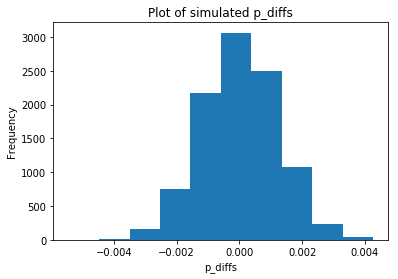

In [34]:
#Show the histogram
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of simulated p_diffs');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
# compute difference from original dataset ab_data.csv
act_diff = df[df['group'] == 'treatment']['converted'].mean() - df[df['group'] == 'control']['converted'].mean()
act_diff

-0.0015790565976871451

In [36]:
 p_diffs = np.array(p_diffs)
p_diffs

array([ 0.00129875, -0.00084193, -0.00055292, ..., -0.0012133 ,
       -0.00020838, -0.0006355 ])

In [37]:
# proportion of p_diffs greater than the actual difference observed in ab_data.csv is computed as:
(act_diff < p_diffs).mean()

0.90939999999999999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

 We are computing p-values here.

As explained in the videos and quizzes, this is the probability of observing our statistic (or one more extreme in favor of the alternative) if
the null hypothesis is true.

The more extreme in favor of the alternative portion of this statement determines the shading associated with your p-value.

Here, we find that there is no conversion advantage with new pages. We conclude that null hypothesis is true as old and new pages
perform almost similarly. Old pages, as the numbers show, performed slightly better.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
 import statsmodels.api as sm
#Number of conversions for each page
convert_old = sum(df2.query('group == "control"')['converted'])
convert_new = sum(df2.query('group == "treatment"')['converted'])
#Number of individuals who received each page
n_old = df2.query("group == 'control'")['user_id'].count()
n_new = df2.query("group == 'treatment'")['user_id'].count()
#Convert figures to integers
n_old = int(n_old)
n_new = int(n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
import statsmodels.api as sm
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [40]:
convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))
#print(convert_old, convert_new, n_old, n_new) #code to test if values generated correctly


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [42]:
from scipy.stats import norm
print(norm.cdf(z_score))
# Tells us how significant our z-score is
# for our single-sides test, assumed at 95% confidence level, we calculate:
print(norm.ppf(1-(0.05)))
# Tells us what our critical value at 95% confidence is
# Here, we take the 95% values as specified in PartII.1


0.905058312759
1.64485362695


We find that the z-score of 1.31092419842 is less than the critical value of 1.64485362695. So, we accept the null hypothesis.
As regards the conversion rates of the old and new pages, we find that old pages are only minutely better than new pages.
These values agree with the findings in parts j. and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
df2['intercept']=1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
import statsmodels.api as sm

mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = mod.fit() #Fitting the model

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
results.summary() #Summary of our test results.


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        10:30:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page column is 0.19 which is lower than the p-value calculated using the z-score function. The reason why is different is due to the intercept added.

In other words the p-value here suggests that that new page is not statistically significant as 0.19 > 0.05. The values are different because in part 2 we randomly sampled the data 10000 times and the sample could have overlapped or been mutually exclusive to an extent to give different values such that differet p-values were received than what we got in logistic regression.


The logistic regression determines only two possible outcomes. If the new page is equal to the old page or different.

**Our hypothesis here is:

$H_{0}$ : $p_{new}$ - $p_{old}$ = 0

$H_{1}$ : $p_{new}$ - $p_{old}$ != 0**



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answers**

I guess it would be interesting to see the correlation between participants' behaviors towards the web page colors. We could check their genders and main reasons why they need to use our website -- for example a child wants to play video game in our website to make friends, have fun, and other reasons. The main advantage is that it would help us to get some ideas or make decision to attract more viewers to click our website.

The main problem to add more additional terms in my regression model, it would look awkward and messy. Again, correlation is not causation. It is all about relationship between two variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
#Read and display countries.csv.; Notice that country consists UK and US
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [48]:
#Inner join two datas
new = countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [49]:
#adding dummy variables with 'CA' as the baseline
new[['US', 'UK']] = pd.get_dummies(new['country'])[['US', "UK"]]
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [50]:
new['US_ab_page'] = new['US']*new['ab_page']
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [51]:
new['UK_ab_page'] = new['UK']*new['ab_page']
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


In [52]:
logit3 = sm.Logit(new['converted'], new[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'US_ab_page']])
logit3

In [53]:
#Check the result
result3 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Mon, 11 Mar 2019   Pseudo R-squ.:               2.589e-05
Time:                        10:32:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2390
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0366      0.028    -72.618      0.000      -2.092      -1.982
ab_page       -0.0018      0.021     -0.086      0.931      -0.043       0.039
US             0.0501      0.030      1.691      0.091      -0.008       0.108
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US_ab_page    -0.0094   7.04e+05  -1.33e-08      1.000   -1.38e+06    1.38e+06
US_ab_page    -0.0094   7.04e+05  -1.33e-08      1.000   -1.38e+06    1.38e+06
==============================================================================
"""

In [55]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [56]:
1/_

0.00010001000100010001

In [57]:
df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

## Conclusions
With change of methodology between part II and part III, p-value changed. But in either case, we fail to reject the null as p-value is still higher than alpha. 

Based on this analysis, there is no practical significance in rolling out the new page over old page. Conversion rate for old page is better than new one. 

Comparing users among different countries also doesn't show considerable difference in statistics. 

# Resources
Udacity Nanodegree Videos and Resources, including Links in this .ipynb

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html

https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

Some helps from internet github.